<a href="https://colab.research.google.com/github/Anubhav-Anand-26/Deep-Learning/blob/main/Deep_Learning(04_10_24)new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (228, 112, 92, 1)
y_train shape: (228, 20)
x_test shape: (160, 112, 92, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 - 13s - 3s/step - accuracy: 0.0614 - loss: 3.6268 - val_accuracy: 0.0000e+00 - val_loss: 3.0285
Epoch 2/5
4/4 - 9s - 2s/step - accuracy: 0.0482 - loss: 3.0079 - val_accuracy: 0.0000e+00 - val_loss: 3.0088
Epoch 3/5
4/4 - 11s - 3s/step - accuracy: 0.0789 - loss: 3.0118 - val_accuracy: 0.0000e+00 - val_loss: 3.0320
Epoch 4/5
4/4 - 12s - 3s/step - accuracy: 0.0658 - loss: 3.0114 - val_accuracy: 0.0833 - val_loss: 2.9998
Epoch 5/5
4/4 - 10s - 3s/step - accuracy: 0.1053 - loss: 2.9903 - val_accuracy: 0.0833 - val_loss: 2.9993
test loss: 2.9816
test accuracy: 0.1750
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


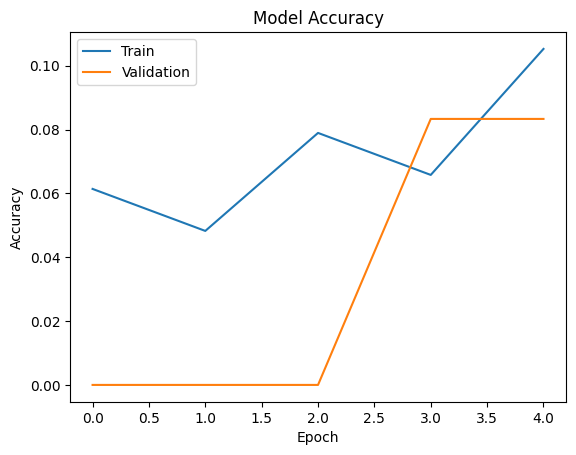

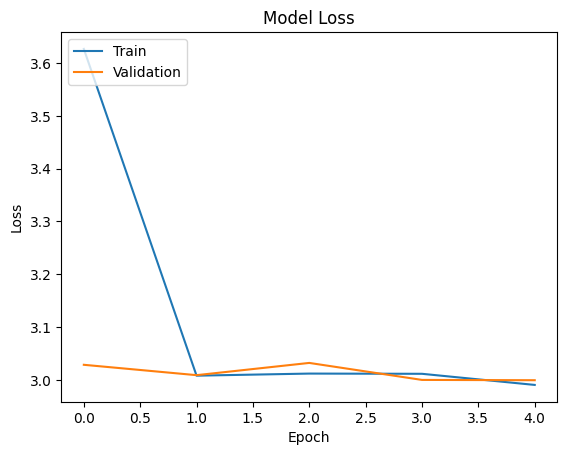

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset from the provided path
data = np.load('/content/ORL_faces(Deep Learning).npz')

# Load the "Train Images"
x_train = data['trainX']
# Normalize every image
x_train = np.array(x_train, dtype='float32') / 255

x_test = data['testX']
x_test = np.array(x_test, dtype='float32') / 255

# Load the Labels of Images
y_train = data['trainY']
y_test = data['testY']

# One-hot encode the labels for categorical_crossentropy loss
num_classes = 20  # Ensure this matches the number of classes in your dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Split training data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.05, random_state=1234)

# Define image properties
im_rows = 112
im_cols = 92
batch_size = 64  # Keep batch size consistent
im_shape = (im_rows, im_cols, 1)

# Reshape the data
x_train = x_train.reshape(-1, *im_shape)
x_test = x_test.reshape(-1, *im_shape)
x_valid = x_valid.reshape(-1, *im_shape)

# Print shapes
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')

# Define the CNN model
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),  # No need for input_shape again
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Ensure number of neurons match num_classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
cnn_model.summary()

# Train the model
history = cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=batch_size,
    epochs=5, verbose=2, validation_data=(np.array(x_valid), np.array(y_valid)),
)

# Evaluate the model on test data
score = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
print(f'test loss: {score[0]:.4f}')
print(f'test accuracy: {score[1]:.4f}')

# Plotting accuracy and loss
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
